In [3]:
import pandas as pd
data = pd.read_excel(r"C:\Users\OM\Downloads\Clustering\EastWestAirlines.xlsx",sheet_name  = 'data')
data.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0.0,1,1,1,174,1,0,0,7000,0
1,2,19244,0.0,1,1,1,215,2,0,0,6968,0
2,3,41354,0.0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0.0,1,1,1,500,1,0,0,6952,0
4,5,97752,0.0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0.0,1,1,1,0,0,0,0,6942,0
6,7,84914,0.0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0.0,1,1,1,5250,4,250,1,6938,1
8,9,443003,NaN,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0.0,3,1,1,28426,28,1150,3,6931,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID#                3999 non-null   int64  
 1   Balance            3999 non-null   int64  
 2   Qual_miles         3998 non-null   float64
 3   cc1_miles          3999 non-null   int64  
 4   cc2_miles          3999 non-null   int64  
 5   cc3_miles          3999 non-null   int64  
 6   Bonus_miles        3999 non-null   int64  
 7   Bonus_trans        3999 non-null   int64  
 8   Flight_miles_12mo  3999 non-null   int64  
 9   Flight_trans_12    3999 non-null   int64  
 10  Days_since_enroll  3999 non-null   int64  
 11  Award?             3999 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 375.0 KB


## The dataset have only integer(int) data type.It is good for not changing the data type

In [5]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           1
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

# There are no null values in the data set

<Axes: >

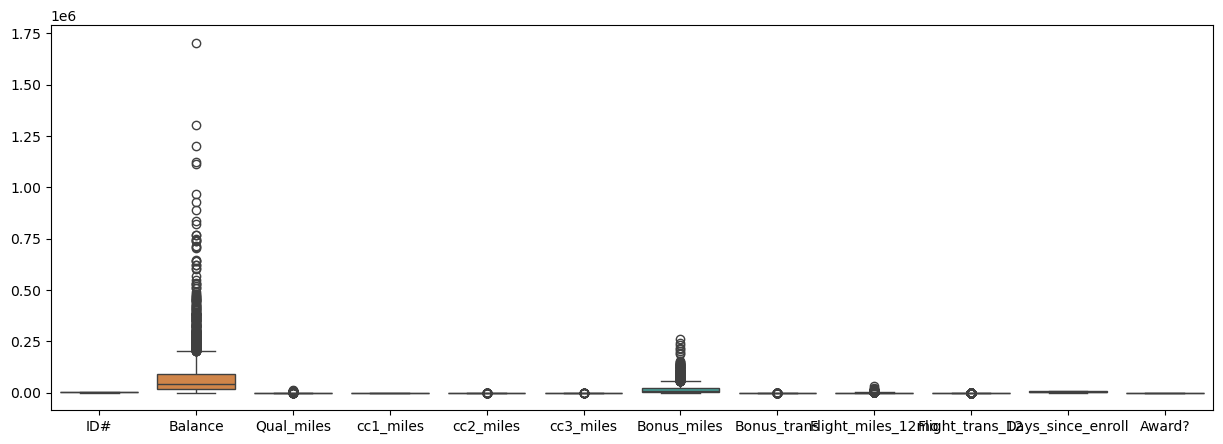

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,5))
sns.boxplot(data)

In [7]:
data['Balance'].value_counts()

1000     10
500       5
2000      5
1500      4
5000      3
         ..
9554      1
30130     1
12665     1
9860      1
3016      1
Name: Balance, Length: 3904, dtype: int64

In [8]:
data['Qual_miles'].value_counts()

0.0       3772
1000.0      17
500.0       15
967.0        4
888.0        4
          ... 
4116.0       1
1388.0       1
1896.0       1
3692.0       1
1005.0       1
Name: Qual_miles, Length: 164, dtype: int64

In [9]:
def remove_outliers(df):
  numerical_columns = df.select_dtypes(include = ['int64']).columns

  for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    Upper_limit = Q3 + (1.5 * IQR)
    Lower_limit = Q1 - (1.5 * IQR)

    df = df[(df[col] >= Lower_limit) & (df[col] <= Upper_limit)]
  return df

data_new = remove_outliers(data)
data_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0.0,1,1,1,174,1,0,0,7000,0
1,2,19244,0.0,1,1,1,215,2,0,0,6968,0
2,3,41354,0.0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0.0,1,1,1,500,1,0,0,6952,0
5,6,16420,0.0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,4015,11181,0.0,1,1,1,929,12,0,0,1407,0
3993,4016,3974,0.0,1,1,1,365,3,0,0,1397,0
3995,4018,64385,0.0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0.0,3,1,1,25447,8,0,0,1402,1


<Axes: >

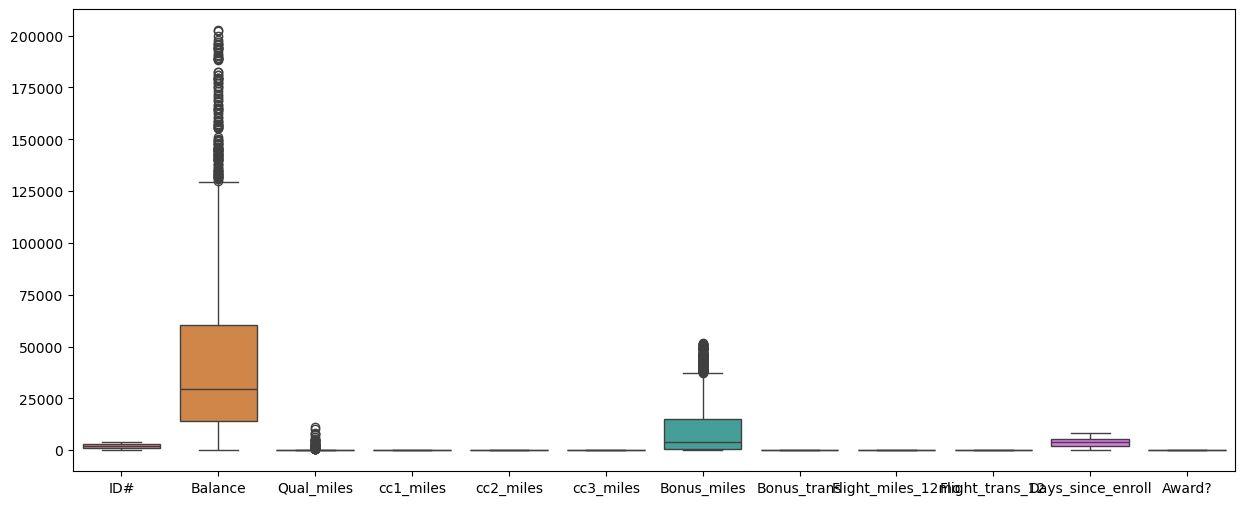

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
sns.boxplot(data_new)

## standardization

In [11]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler()
df = scaled_data.fit_transform(data_new)
df

array([[-1.83568305, -0.3738639 , -0.12801638, ...,  0.        ,
         1.50272938, -0.57955691],
       [-1.83482022, -0.5919065 , -0.12801638, ...,  0.        ,
         1.48722841, -0.57955691],
       [-1.8339574 , -0.05016903, -0.12801638, ...,  0.        ,
         1.51919915, -0.57955691],
       ...,
       [ 1.63027077,  0.51413471, -0.12801638, ...,  0.        ,
        -1.21236196,  1.72545608],
       [ 1.63113359,  0.73984641, -0.12801638, ...,  0.        ,
        -1.20897113,  1.72545608],
       [ 1.63285923, -0.98952367, -0.12801638, ...,  0.        ,
        -1.21090875, -0.57955691]])

In [12]:
new_df = pd.DataFrame(df,columns = ['ID#',	'Balance'	,'Qual_miles',	'cc1_miles',	'cc2_miles',	'cc3_miles',	'Bonus_miles','Bonus_trans'	,'Flight_miles_12mo'	,'Flight_trans_12',	'Days_since_enroll',	'Award?'])
new_df


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.835683,-0.373864,-0.128016,-0.691838,0.0,0.0,-0.768990,-1.047995,0.0,0.0,1.502729,-0.579557
1,-1.834820,-0.591906,-0.128016,-0.691838,0.0,0.0,-0.765670,-0.912874,0.0,0.0,1.487228,-0.579557
2,-1.833957,-0.050169,-0.128016,-0.691838,0.0,0.0,-0.449181,-0.642630,0.0,0.0,1.519199,-0.579557
3,-1.833095,-0.701381,-0.128016,-0.691838,0.0,0.0,-0.742589,-1.047995,0.0,0.0,1.479478,-0.579557
4,-1.831369,-0.661100,-0.128016,-0.691838,0.0,0.0,-0.783081,-1.183117,0.0,0.0,1.474634,-0.579557
...,...,...,...,...,...,...,...,...,...,...,...,...
2437,1.627682,-0.789465,-0.128016,-0.691838,0.0,0.0,-0.707847,0.438343,0.0,0.0,-1.206549,-0.579557
2438,1.628545,-0.966051,-0.128016,-0.691838,0.0,0.0,-0.753522,-0.777752,0.0,0.0,-1.211393,-0.579557
2439,1.630271,0.514135,-0.128016,-0.691838,0.0,0.0,-0.703635,-0.507509,0.0,0.0,-1.212362,1.725456
2440,1.631134,0.739846,-0.128016,1.147540,0.0,0.0,1.277740,-0.102144,0.0,0.0,-1.208971,1.725456


<Axes: >

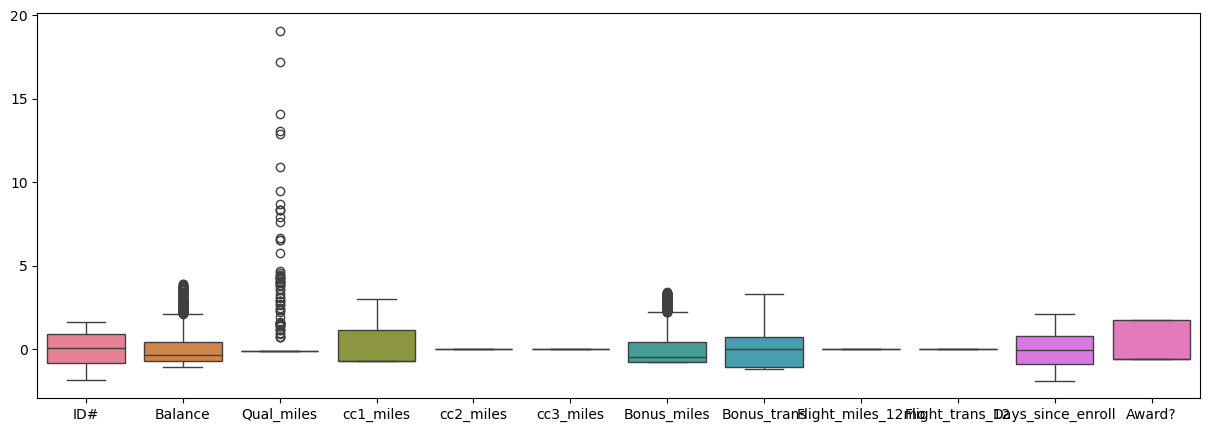

In [13]:
plt.figure(figsize = (15,5))
sns.boxplot(new_df)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


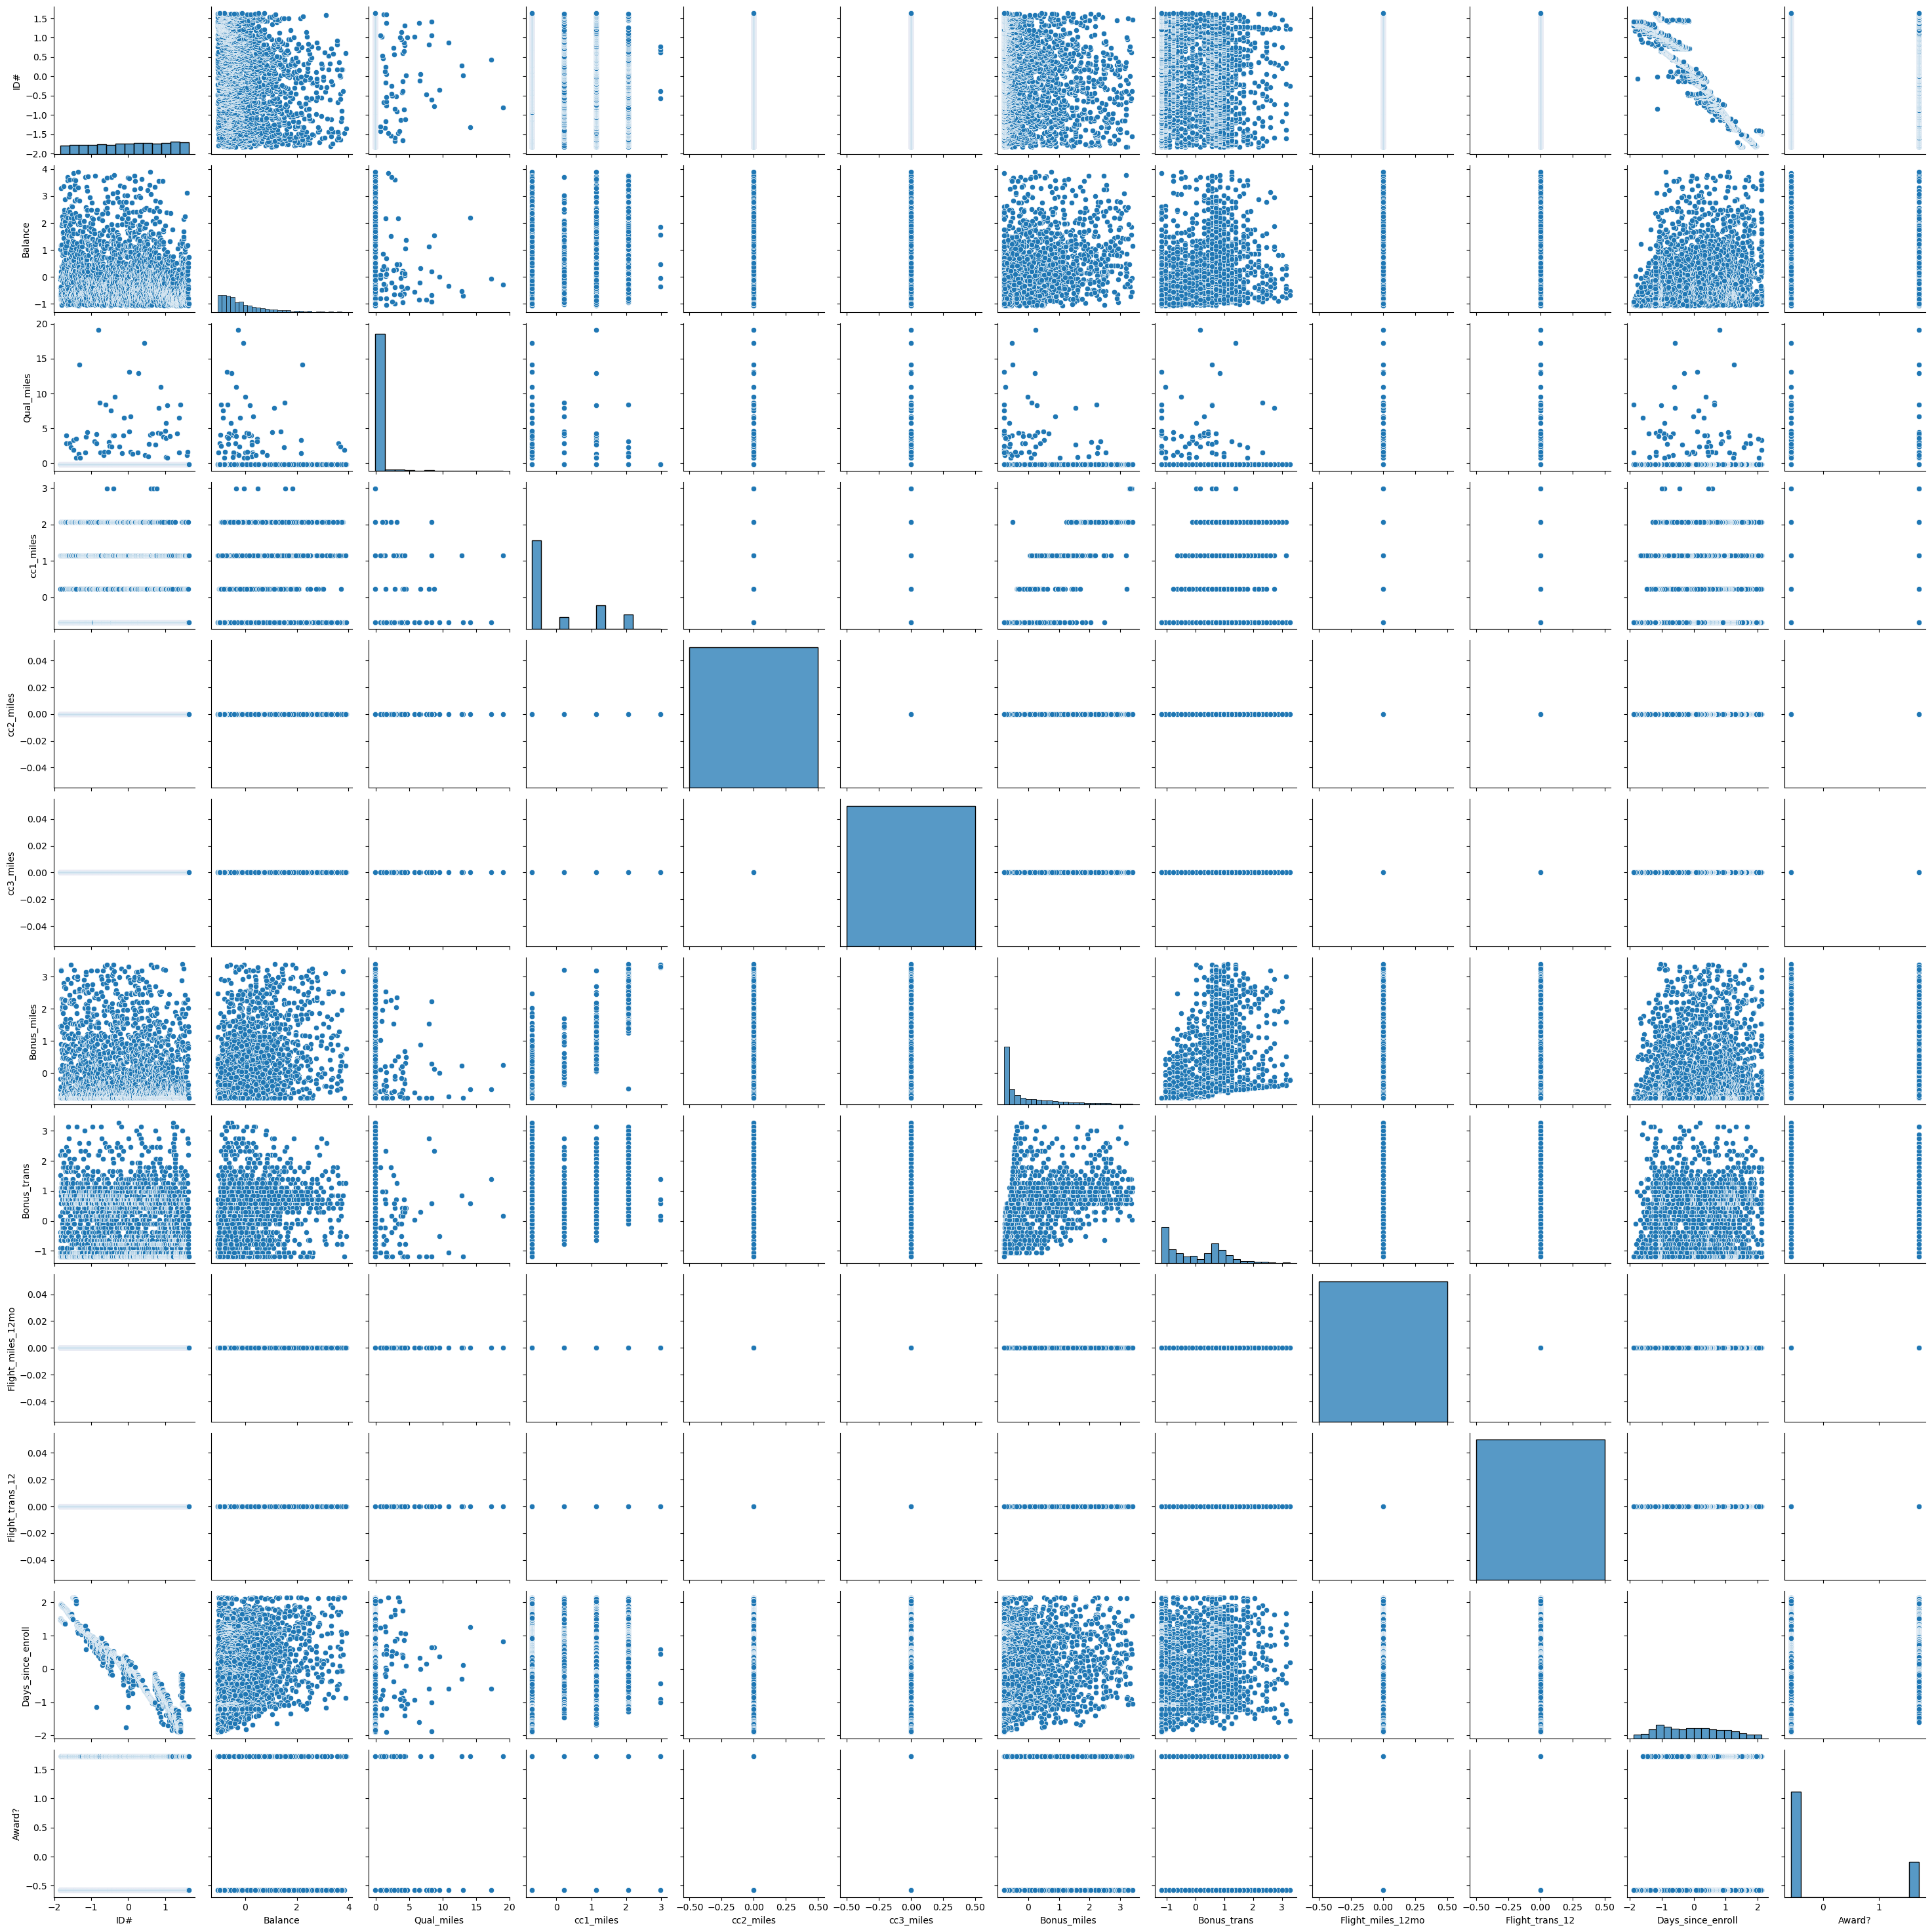

In [14]:
import seaborn as sns
sns.pairplot(new_df)

In [15]:
new_df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.221940,-0.004647,-0.176912,NaN,NaN,-0.153575,-0.118317,NaN,NaN,-0.964548,-0.136681
Balance,-0.221940,1.000000,0.011894,0.457860,NaN,NaN,0.455732,0.354162,NaN,NaN,0.241346,0.038547
Qual_miles,-0.004647,0.011894,1.000000,-0.002585,NaN,NaN,-0.005178,0.006091,NaN,NaN,0.005138,0.035434
cc1_miles,-0.176912,0.457860,-0.002585,1.000000,NaN,NaN,0.895589,0.625642,NaN,NaN,0.188431,0.323034
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,-0.153575,0.455732,-0.005178,0.895589,NaN,NaN,1.000000,0.620065,NaN,NaN,0.163243,0.348293
Bonus_trans,-0.118317,0.354162,0.006091,0.625642,NaN,NaN,0.620065,1.000000,NaN,NaN,0.132838,0.248433
Flight_miles_12mo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight_trans_12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'ID#'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'Qual_miles'}>],
       [<Axes: title={'center': 'cc1_miles'}>,
        <Axes: title={'center': 'cc2_miles'}>,
        <Axes: title={'center': 'cc3_miles'}>],
       [<Axes: title={'center': 'Bonus_miles'}>,
        <Axes: title={'center': 'Bonus_trans'}>,
        <Axes: title={'center': 'Flight_miles_12mo'}>],
       [<Axes: title={'center': 'Flight_trans_12'}>,
        <Axes: title={'center': 'Days_since_enroll'}>,
        <Axes: title={'center': 'Award?'}>]], dtype=object)

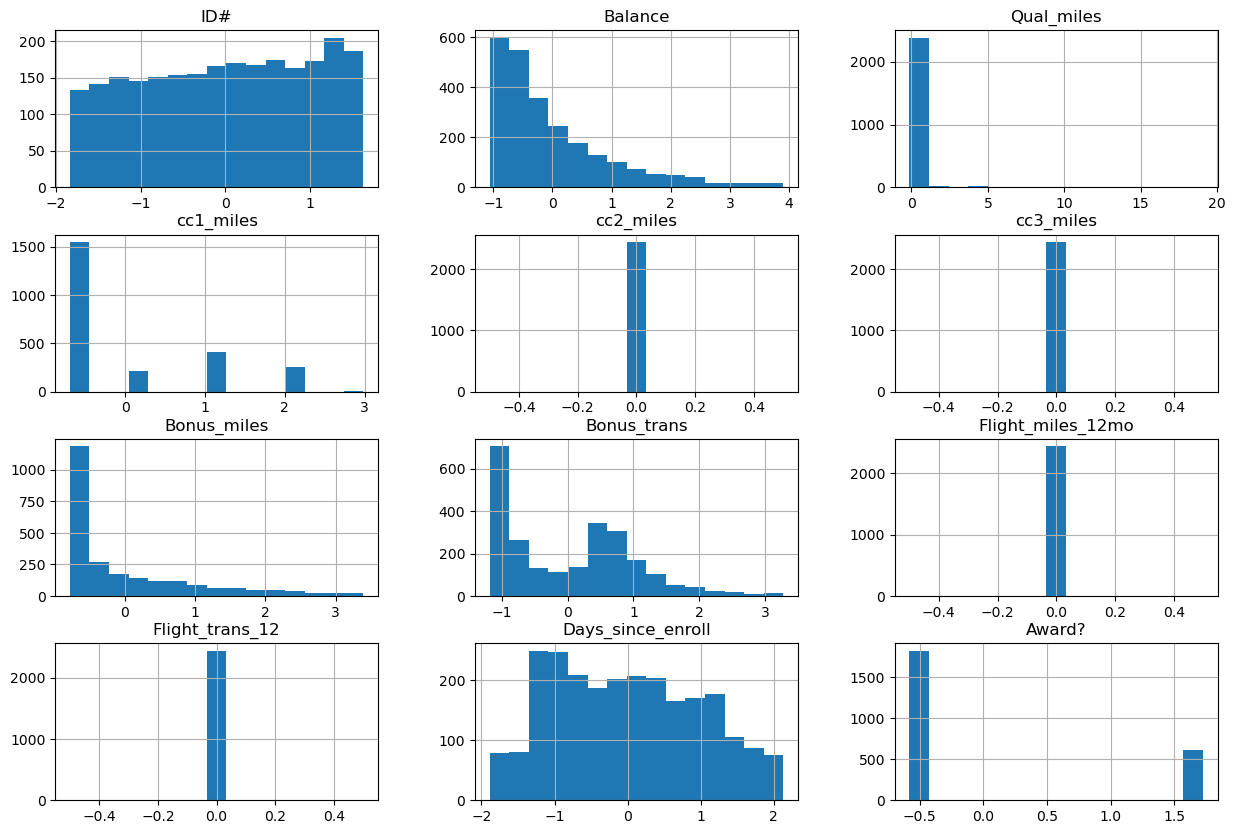

In [16]:
new_df.hist(bins = 15 , figsize = (15,10))

<Axes: >

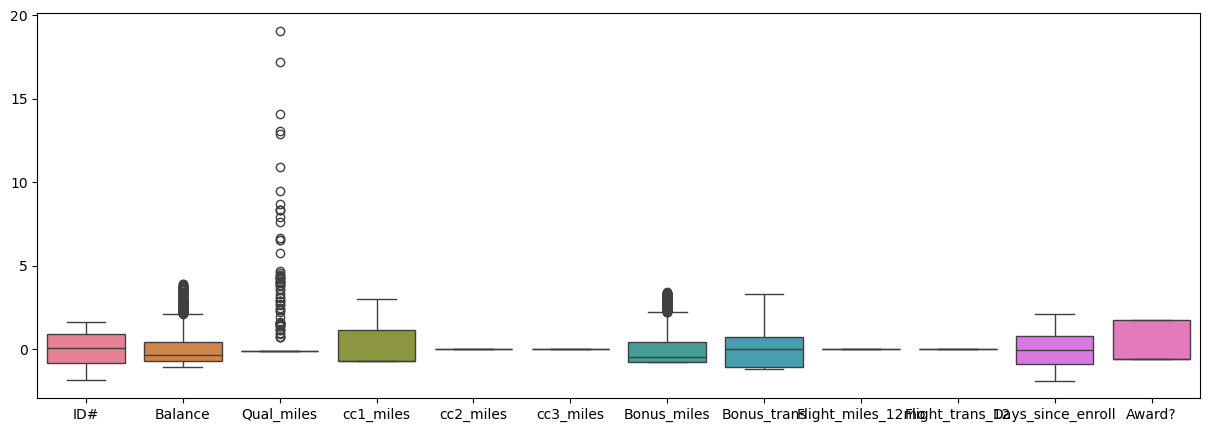

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
sns.boxplot(new_df)

In [18]:
data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019462,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.109077,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019462,0.109077,1.000000,0.007964,-0.013689,-0.007782,0.030993,0.050946,0.126981,0.144277,0.017380,0.095338
cc1_miles,-0.224465,0.338344,0.007964,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013689,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007782,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.030993,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050946,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126981,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144277,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


<Axes: >

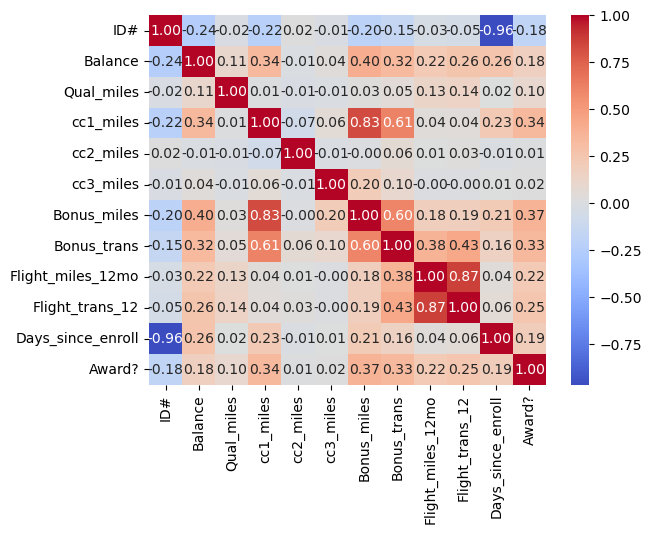

In [19]:
#correlation
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot = True,cmap = 'coolwarm',fmt= '.2f')

<Axes: >

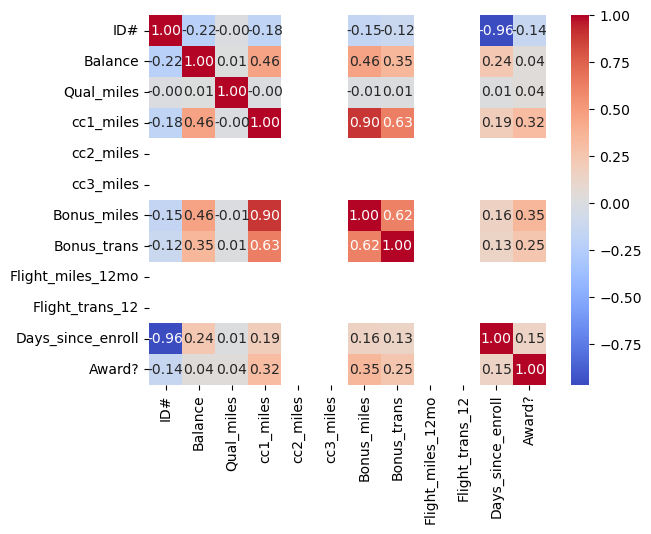

In [20]:
#correlation
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix,annot = True,cmap = 'coolwarm',fmt= '.2f')

## implementing clustering algorithms

## hierarchical clustering

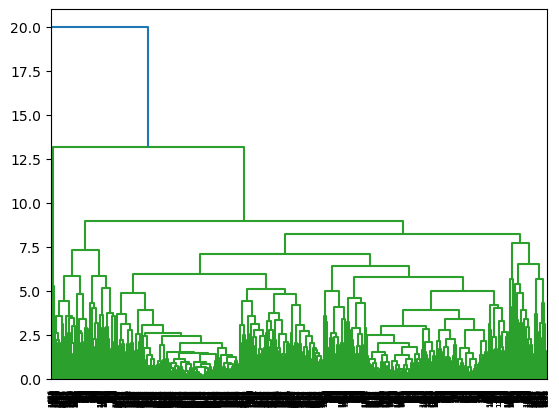

In [22]:
import scipy.cluster.hierarchy as sch
#plt.figure(figsize = (15,5))
dendo = sch.dendrogram(sch.linkage(new_df ,method = 'complete'))

In [24]:
from sklearn.cluster import AgglomerativeClustering
HC = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
HC


AgglomerativeClustering(linkage='complete', n_clusters=4)

In [25]:
y_hc = HC.fit_predict(new_df)
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
data_new['h_clustered'] = y_hc
data_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered
0,1,28143,0.0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0.0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0.0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0.0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0.0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,4015,11181,0.0,1,1,1,929,12,0,0,1407,0,0
3993,4016,3974,0.0,1,1,1,365,3,0,0,1397,0,0
3995,4018,64385,0.0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0.0,3,1,1,25447,8,0,0,1402,1,0


In [27]:
data_new[data_new['h_clustered'] == 0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered
0,1,28143,0.0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0.0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0.0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0.0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0.0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,4015,11181,0.0,1,1,1,929,12,0,0,1407,0,0
3993,4016,3974,0.0,1,1,1,365,3,0,0,1397,0,0
3995,4018,64385,0.0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0.0,3,1,1,25447,8,0,0,1402,1,0


In [28]:
data_new[data_new['h_clustered']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered
6,7,84914,0.0,3,1,1,27482,25,0,0,6994,0,1
15,16,28495,0.0,4,1,1,49442,15,0,0,6912,1,1
16,17,51890,0.0,4,1,1,48963,16,0,0,6910,1,1
18,19,91473,0.0,3,1,1,27408,17,0,0,6903,1,1
30,31,177926,0.0,3,1,1,20797,13,0,0,7886,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,3904,32424,0.0,4,1,1,39635,16,0,0,1584,1,1
3886,3909,84979,0.0,4,1,1,36702,16,0,0,1600,0,1
3899,3922,90666,0.0,4,1,1,32474,14,0,0,1582,0,1
3966,3989,91605,0.0,4,1,1,37840,18,0,0,1444,0,1


In [29]:
data_new[data_new['h_clustered'] == 2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered
1225,1238,106234,5124.0,2,1,1,11160,26,0,0,5238,0,2
1415,1429,15592,4924.0,4,1,1,37173,13,0,0,5209,1,2
1561,1576,8962,4481.0,1,1,1,0,0,0,0,4198,0,2
1695,1711,43749,5583.0,1,1,1,9557,5,0,0,4664,0,2
1984,2001,35080,3867.0,1,1,1,0,0,0,0,4562,0,2
2175,2192,56693,3953.0,2,1,1,20454,11,0,0,3893,1,2
3063,3085,89112,4670.0,2,1,1,28670,29,0,0,2680,0,2
3122,3144,29754,6396.0,1,1,1,500,1,0,0,2655,0,2
3295,3318,21311,3418.0,1,1,1,2000,9,0,0,1990,0,2
3336,3359,51169,4903.0,3,1,1,13080,13,0,0,1809,0,2


In [30]:
data_new[data_new['h_clustered'] == 3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered
589,596,133445,8264.0,1,1,1,3375,13,0,0,6492,1,3
1177,1189,32214,11148.0,3,1,1,12717,10,0,0,5576,1,3
2142,2159,15326,7663.0,1,1,1,0,0,0,0,4140,0,3
2436,2455,21875,7558.0,3,1,1,12398,15,0,0,3299,1,3
2605,2624,41152,10074.0,1,1,1,3250,19,0,0,2669,0,3


In [31]:
data_new.groupby('h_clustered').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clustered,,,,,,,,,,,,
0,2218.467012,36913.877945,33.675778,1.455231,1.0,1.0,6096.819039,7.631951,0.0,0.0,3730.369934,0.215834
1,1487.544554,88906.603960,30.432343,3.834983,1.0,1.0,34723.082508,16.577558,0.0,0.0,5091.904290,0.498350
2,2545.583333,39386.250000,4675.750000,1.666667,1.0,1.0,10216.166667,8.916667,0.0,0.0,3126.833333,0.166667
3,1804.600000,48802.400000,8941.400000,1.800000,1.0,1.0,6348.000000,11.400000,0.0,0.0,4435.200000,0.600000


In [32]:
data_new['h_clustered'].mean()

0.14004914004914004

## k -means clustering

scaled data = new_df

old data = data

remove outlier data = data_new

# Elbow chart

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

[19535.999999999967, 13840.296216040359, 12497.621614619708, 10810.746053710514, 8477.204987989198, 7743.329939353467, 7268.307445617072, 6520.879671639634, 6114.65958175052]


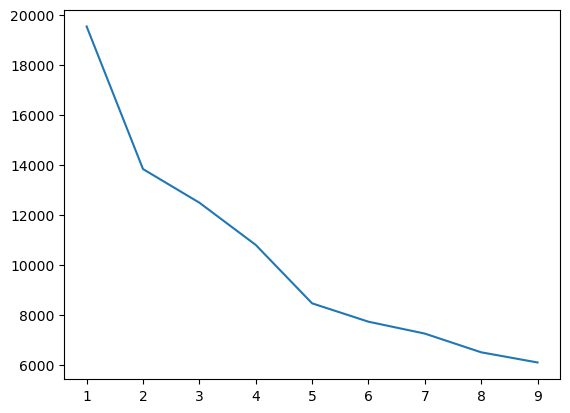

In [34]:
#wcss (within cluster sum of squares)
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters = i , random_state = 0 )
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_) #inertia = variance
print(wcss)
plt.plot(range(1,10),wcss)

In [35]:
k_cluster= KMeans(n_clusters = 4 , random_state = 0)
kmc = k_cluster.fit(new_df)
kmc

KMeans(n_clusters=4, random_state=0)

In [36]:
y_kmc = kmc.fit_predict(new_df)
y_kmc

array([1, 1, 1, ..., 1, 0, 1])

In [37]:
data_new['k_clustered'] = y_kmc

In [38]:
data_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered,k_clustered
0,1,28143,0.0,1,1,1,174,1,0,0,7000,0,0,1
1,2,19244,0.0,1,1,1,215,2,0,0,6968,0,0,1
2,3,41354,0.0,1,1,1,4123,4,0,0,7034,0,0,1
3,4,14776,0.0,1,1,1,500,1,0,0,6952,0,0,1
5,6,16420,0.0,1,1,1,0,0,0,0,6942,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,4015,11181,0.0,1,1,1,929,12,0,0,1407,0,0,1
3993,4016,3974,0.0,1,1,1,365,3,0,0,1397,0,0,1
3995,4018,64385,0.0,1,1,1,981,5,0,0,1395,1,0,1
3996,4019,73597,0.0,3,1,1,25447,8,0,0,1402,1,0,0


# DBscan

In [39]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 3 , min_samples =4)
dbscan.fit(new_df)

DBSCAN(eps=3, min_samples=4)

In [40]:
y_dbscan = dbscan.fit_predict(new_df)
y_dbscan

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
data_new['dbs_clustered'] = y_dbscan

In [42]:
data_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered,k_clustered,dbs_clustered
0,1,28143,0.0,1,1,1,174,1,0,0,7000,0,0,1,0
1,2,19244,0.0,1,1,1,215,2,0,0,6968,0,0,1,0
2,3,41354,0.0,1,1,1,4123,4,0,0,7034,0,0,1,0
3,4,14776,0.0,1,1,1,500,1,0,0,6952,0,0,1,0
5,6,16420,0.0,1,1,1,0,0,0,0,6942,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,4015,11181,0.0,1,1,1,929,12,0,0,1407,0,0,1,0
3993,4016,3974,0.0,1,1,1,365,3,0,0,1397,0,0,1,0
3995,4018,64385,0.0,1,1,1,981,5,0,0,1395,1,0,1,0
3996,4019,73597,0.0,3,1,1,25447,8,0,0,1402,1,0,0,0


In [43]:
data_new['h_clustered'].value_counts()

0    2122
1     303
2      12
3       5
Name: h_clustered, dtype: int64

In [44]:
data_new['k_clustered'].value_counts()

1    1493
2     501
0     431
3      17
Name: k_clustered, dtype: int64

In [45]:
data_new['dbs_clustered'].value_counts()

 0    2433
-1       9
Name: dbs_clustered, dtype: int64

In [46]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
hc_s_c = metrics.silhouette_score(new_df, y_hc)
hc_s_c

0.3377147481081095

In [47]:
kmc_s_c = metrics.silhouette_score(new_df, y_kmc)
kmc_s_c

0.3173932638235773

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

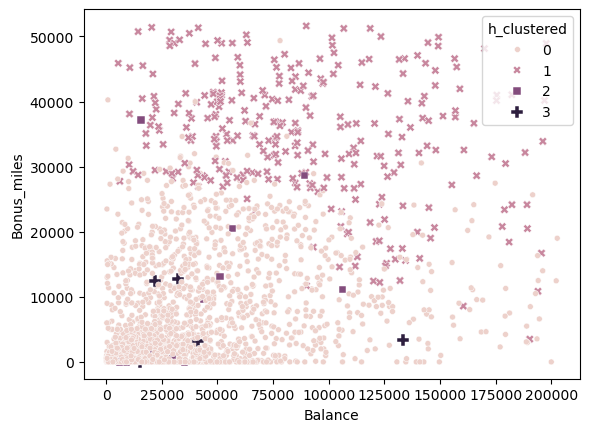

In [48]:
import seaborn as sns
sns.scatterplot(data = data_new , x = 'Balance' ,y = 'Bonus_miles' , hue = 'h_clustered' , style = 'h_clustered', size = "h_clustered")

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

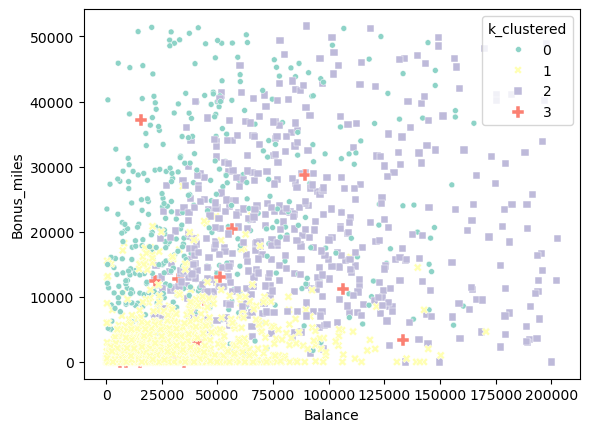

In [49]:
import seaborn as sns
sns.scatterplot(data = data_new , x = 'Balance' ,y = 'Bonus_miles' , hue = 'k_clustered' , style = 'k_clustered', size = "k_clustered",palette = 'Set3')

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

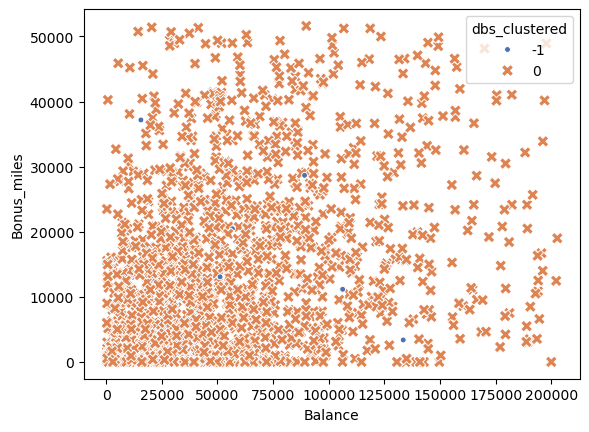

In [50]:
import seaborn as sns
sns.scatterplot(data = data_new , x = 'Balance' ,y = 'Bonus_miles' , hue = 'dbs_clustered' , style = 'dbs_clustered', size = "dbs_clustered" , palette = 'deep')

<Axes: >

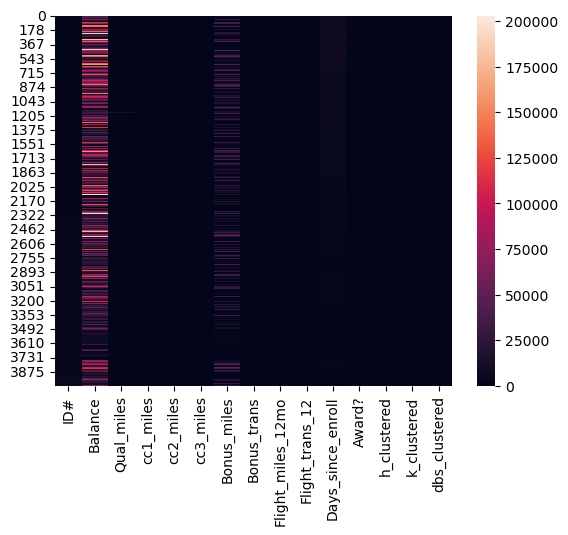

In [51]:
sns.heatmap(data_new)